<a href="https://colab.research.google.com/github/LotaSchwager/ADA-Informes/blob/main/Informe_SubArrayMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe Máximo sub-arreglo


# 1. Problema de optimización
Se llama así a un problema que busca minimizar o maximizar el valor de una "variable". O sea es un problema que trata de calcular el valor máximo o mínimo de una función o en nuestro caso, de un arreglo de tamaño n. 


Este problema de optimización se puede ver en ejemplos como:


*   Minimizar el tiempo de espera o de recorrido
*   Maximizar el volumen de un contenedor
*   Maximizar o minimizar el coste de un objeto de lados xyz

Teniendo el problema ya entendido significa que la entrada y salida es distinta a los del problema de ordenamiento.

## 1.1. ¿Qué es el máximo sub-arreglo?

 El problema de máximo sub-arreglo es el método para encontrar el sub-arreglo contiguo dentro de un arreglo [n] de números que tiene la suma más grande.

El problema fue propuesto en un principio por Ulf Grenander de la Brown University en 1977, como un modelo simplificado para la estimación de máxima probabilidad de patrones en imágenes digitalizadas. 

**Entrada** : Arreglo [ a<sub>1</sub> ,......, a<sub>n</sub> ].

**Salida** : Sub-Arreglo [ a<sub>i</sub> ,......, a<sub>j</sub> ]. Un sub arreglo creado a partir de arreglo de entrada, donde su suma de elementos es mayor a cualquier otro sub-arreglo formado también a partir del arreglo de entrada, junto a este sub-arreglo también se retorna los índices i y j que son el principio y final de este sub-arreglo como también posiciones pertenecientes al arreglo de entrada.

# 2. Descripción del algoritmo con Divide y Vencerás
En el algoritmo máximo sub-arreglo, el paradigma divide y vencerás ayuda a reducir el problema dividiéndolos en 2 sub-arreglos, buscando recursivamente el máximo sub-arreglo para cada sub-arreglo creado.

En el siguiente pseudocódigo se mostrará como funciona el algoritmo con el paradigma divide y vencerás.

```
// Los valores originales deberían ser low = 0 y high = n-1

//Función recursiva que divide el arreglo de tamaño n en 2 sub-arreglos de
//Tamaño n/2 y retorna la mayor suma del sub-arreglo
int maxSubarraySum (int A[], int low, int high){

   //Si el arreglo tiene tamaño 1 retornará arreglo[0]
   if (low == high): return A[low]
   
   //Calculado la mitad del arreglo
   mid = (high + low)//2

   //Recursividad
   left_sum = maxSubarraySum (A, low, mid) //izquierda
   right_sum = maxSubarraySum (A, mid+1, high) //derecha

   //Calcula el valor combinado del sub-arreglo[izquierda] 
   //y sub-arreglo[derecha]
   int crossing_Sum = maxCrossingSum(A, low, mid, high)
 
   //Retorna el valor máximo entre los sub-arreglos izquierda, derecha,medio   
   return max (left_sum, right_sum, crossing_Sum)

}
```
Como se ve en el pseudocódigo la función utiliza 3 sub-arreglos:


*   El sub-arreglo de la izquierda del arreglo que va entre el 0 y la mitad  
*   El sub-arreglo de la derecha del arreglo que va entre la (mitad + 1) y (n-1)
*   El sub-arreglo que va en medio de los 2 sub-arreglos anteriores


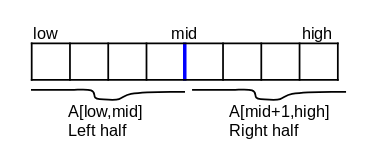


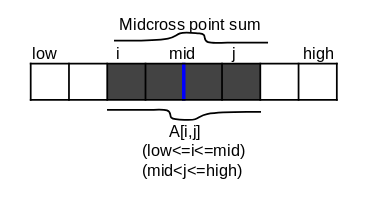


Pasos que realiza el algoritmo para solucionar el problema:


1.   Divide el arreglo[ n ] en 2 sub-arreglos[ n / 2 ].

2.   Recursivamente, calcula la máxima suma para los sub-arreglos de la
     izquierda y derecha.
     
3.   Se calcula el valor máximo del sub-arreglo que pasa cruza por ambos
     sub-arreglos.
     
4.   Retorna el valor más alto comparando los 3 sub-arreglos.


## 2.1. Ejemplo

Tenemos el siguiente arreglo:

arreglo = [ -6, -2, 8, 3, 4, -2 ]

El paradigma divide y vencerás hará su trabajo dividiendo el arreglo en 2 sub-arreglos.

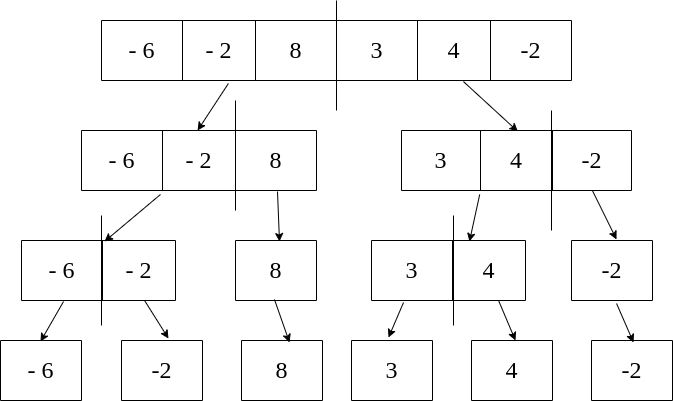

*Recordar que el valor máximo central es la suma de los valores (izquierda + derecha).

**Veamos que pasa con el sub-arreglo de la izquierda** [ -6, -2 ,8 ]

Primero se realiza el valor máximo de [ -6, -2 ]

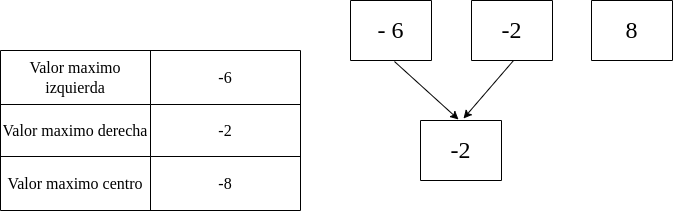

Comparando los 3 valores máximos se tiene que el valor máximo de la derecha es el mayor - 2. 

Ahora viene [ -2, 8 ]

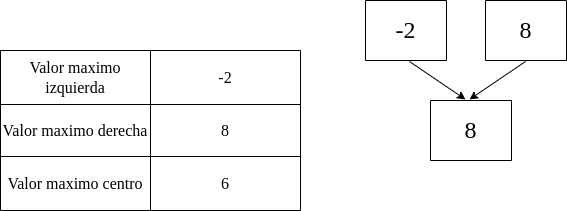

El valor 8 termina siendo el valor máximo del sub-arreglo de la izquierda.



**Veamos que pasa con el sub-arreglo de la derecha** [ 3, 4, -2 ]

Primero se realiza el valor máximo de [ 3, 4 ]

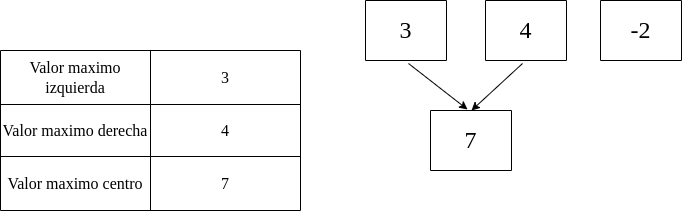

El valor máximo de esa operación es 7, ahora viene [ 7, -2 ]

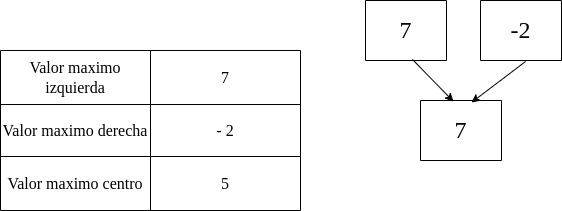

El valor máximo del sub-arreglo de la derecha es 7.



**Ahora a comparar los valores de los sub-arreglos:**

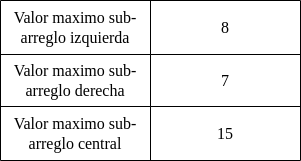

Comparando los 3 valores máximos se tiene que el sub-arreglo central es el valor máximo con 15, así obteniendo el resultado final.

# 3. Implementación del algoritmo en Python

El sub-arreglo máximo en conjunto con el paradigma divide y vencerás implementado en Python. Esta vez se añadirá que la función retorna los índices i y j que representan el principio y el fin del sub-arreglo cuya suma es el valor máximo.

In [6]:
import random
from termcolor import colored
import copy
  
#Funcion recursiva que utiliza el divide y venceras
def find_max_subarray(arreglo, start, end, verbose = False, salida = False):
    # base case
    if start == end :return start, end, arreglo[start]
    
    #mitad del arreglo
    mid = (start + end)//2

    #Recursivdad sub-arreglo izquierdo
    left_start, left_end, left_max = find_max_subarray(arreglo, start, mid, verbose)
    #Recursividad sub-arreglo derecho
    right_start, right_end, right_max = find_max_subarray(arreglo, mid + 1, end, verbose)
    #Valor maximo de los 3 sub-arreglos
    central_start, central_end, central_max = find_max_crossing_subarray(arreglo, start, mid, end)
    
	#Muestra el los 3 sub-arreglos formados en cada recursion
	#Se muestra en rojo la suma max mas grande de los 3
    if verbose == True:
        if salida == True:
              print (colored(f"{'Sub-Arreglos Final :'}","green"))
        else:
              print (colored(f"{'Sub-Arreglos Resultantes :'}","green"))
        
        maximo = max(left_max,right_max,central_max)
   
        if left_start == left_end:
            print ("Maximo sub-arreglo izquierdo :[",str(arreglo[left_start]),"]")
            if maximo == left_max:
                print ("Suma maxima por la izquierda es :", colored(f"{left_max}","red"), "\n")
            else:
                print ("Suma maxima por la izquierda es :", colored(f"{left_max}","blue"), "\n")   
        else:
            print ("Maximo sub-arreglo izquierdo :",str(arreglo[left_start:left_end]))
            if maximo == left_max:
                print ("Suma maxima por la izquierda es :", colored(f"{left_max}","red"), "\n")
            else:
                print ("Suma maxima por la izquierda es :", colored(f"{left_max}","blue"), "\n")
        
        if right_start == right_end:
            print ("Maximo sub-arreglo derecho :[",str(arreglo[right_start]),"]")
            if maximo == right_max:
                print ("Suma maxima por la derecha es :", colored(f"{right_max}","red"), "\n")
            else:
                print ("Suma maxima por la derecha es :", colored(f"{right_max}","blue"), "\n")
        else:
            print ("Maximo sub-arreglo derecho :",str(arreglo[right_start:right_end]))
            if maximo == right_max:
                print ("Suma maxima por la derecha es :", colored(f"{right_max}","red"), "\n")
            else:
                print ("Suma maxima por la derecha es :", colored(f"{right_max}","blue"), "\n")
    
        if central_start == central_end:
            print ("Maximo sub-arreglo central :[",str(arreglo[central_start]),"]")
            if maximo == central_max:
                print ("Suma maxima por el centro es :", colored(f"{central_max}","red"), "\n")
            else:
                print ("Suma maxima por el centro es :", colored(f"{central_max}","blue"), "\n")
        else:
            print ("Maximo sub-arreglo central :",str(arreglo[central_start:central_end]))
            if maximo == central_max:
                print ("Suma maxima porel centro es :", colored(f"{central_max}","red"), "\n")
            else:
                print ("Suma maxima por el centro es :", colored(f"{central_max}","blue"), "\n")

    #Si el valor maximo es el sub-arreglo izquierdo lo retornara
    if (left_max > right_max and left_max > central_max):
          return left_start, left_end, left_max
    #Si el valor maximo es el sub-arreglo derecho lo retornara			
    elif (right_max > left_max and right_max > central_max):
          return right_start, right_end, right_max
    #Si el valor maximo es el sub-arreglo central lo retornara			
    else:
          return central_start, central_end, central_max

#Funcion que encontraba la maxima suma de 3 sub-arreglos 
def find_max_crossing_subarray(arreglo, start, mid, end):
    #Suma de la parte izquierda
    sum_left = float('-inf')
    sum_temp = 0
    central_start = mid
    for i in range(mid , start - 1, -1):
        sum_temp = sum_temp + arreglo[i]
        if sum_temp > sum_left:
            sum_left = sum_temp
            central_start = i

    #Suma de la parte derecha 
    sum_right = float('-inf')
    sum_temp = 0
    central_end = mid + 1
    for i in range(mid + 1, end + 1):
        sum_temp = sum_temp + arreglo[i]
        if sum_temp > sum_right:
            sum_right = sum_temp
            central_end = i + 1
    
    #Retorna la posicon inicial, posicion final, suma maxima 
    return central_start, central_end, sum_left + sum_right

# Ejemplo
arr =  [ -6, 2, -8, 3, 4, -2 ,-5,-7,-8,-9,-10]
n = len(arr)

print ("Arreglo de entrada :", arr, "\n")
indice1,indice2,max_sum = find_max_subarray(arr, 0, n-1, verbose = False, salida = False)
print ("Sub-Arreglo con la suma maxima :", str(arr[indice1:indice2]))
print ("Suma maxima es :", colored(f"{max_sum}","red"))

Arreglo de entrada : [-6, 2, -8, 3, 4, -2, -5, -7, -8, -9, -10] 

Sub-Arreglo con la suma maxima : [3, 4]
Suma maxima es : 7


### Ejecución del algoritmo con Verbose = True


In [7]:
array = random.sample(range(-20, 20), 6)
n = len(array)

print ("Arreglo de entrada :", colored(f"{array}","yellow"), "\n")
i1,i2,maximo= find_max_subarray(array, 0, n - 1, verbose = True, salida = True)

#Si resultado que solo 1 valor es la suma mayor me salia [] como vacio asique
#hice este if para revertir en caso de que ocurriera
if i1 != i2:
    print ("Sub-Arreglo con la suma maxima :", colored(f"{str(array[i1:i2])}","yellow"))
else:
    print ("Sub-Arreglo con la suma maxima : [", colored(f"{str(array[i1])}","yellow"),"]") 
print ("Suma maxima es :", colored(f"{maximo}","red"))

Arreglo de entrada : [2, -8, -20, -17, -9, 7] 

Sub-Arreglos Resultantes :
Maximo sub-arreglo izquierdo :[ 2 ]
Suma maxima por la izquierda es : 2 

Maximo sub-arreglo derecho :[ -8 ]
Suma maxima por la derecha es : -8 

Maximo sub-arreglo central : [2, -8]
Suma maxima por el centro es : -6 

Sub-Arreglos Resultantes :
Maximo sub-arreglo izquierdo :[ 2 ]
Suma maxima por la izquierda es : 2 

Maximo sub-arreglo derecho :[ -20 ]
Suma maxima por la derecha es : -20 

Maximo sub-arreglo central : [2, -8, -20]
Suma maxima por el centro es : -26 

Sub-Arreglos Resultantes :
Maximo sub-arreglo izquierdo :[ -17 ]
Suma maxima por la izquierda es : -17 

Maximo sub-arreglo derecho :[ -9 ]
Suma maxima por la derecha es : -9 

Maximo sub-arreglo central : [-17, -9]
Suma maxima por el centro es : -26 

Sub-Arreglos Resultantes :
Maximo sub-arreglo izquierdo :[ -9 ]
Suma maxima por la izquierda es : -9 

Maximo sub-arreglo derecho :[ 7 ]
Suma maxima por la derecha es : 7 

Maximo sub-arreglo central

Una observacion del paso a paso es que desde el primer sub-arreglo resultante
, el destacado con rojo representa la suma mayor de esa recursividad pero este
valor tambien esta presente en el siguiete sub-arreglo resultante y lo seguira
estando hasta que otro valor mayor lo reemplaze.

# 4. Tiempo de ejecucion


Recordando el pseudocodigo entregado anteriormente, lo utilizaremos para formar un T(n) y con eso calcular a travez del teorema maestro su tiempo de ejecucion.
```
int maxSubarraySum (int A[], int low, int high){

   if (low == high): return A[low]

   mid = (high + low)//2

   left_sum = maxSubarraySum (A, low, mid) 
   right_sum = maxSubarraySum (A, mid+1, high)

   int crossing_Sum = maxCrossingSum(A, low, mid, high)
  
   return max (left_sum, right_sum, crossing_Sum)
}
```



**Primero caso** : 
```
 if (low == high): return A[low]
 mid = (high + low)//2
```
Una comparación o una operación simple es de O(1) por lo que lo dejaré como 
`T(n) = c`, con c una constante.

**Segundo paso**:
```
left_sum = maxSubarraySum (A, low, mid) 
right_sum = maxSubarraySum (A, mid+1, high)
```
Recursividad que se llama 2 veces y esta divide el arreglo a la mitad dejando la `T(n) = 2T(n/2)`, el 2T representa la recursividad de la función y n/2 el cómo divide el arreglo.

**Tercero paso**:
```
int crossing_Sum = maxCrossingSum(A, low, mid, high)
```
La función recorre 2 sub-arreglos de tamaño n/2 sumando y buscando la suma máxima, dejando la `T(n) = cn`, la n es el tamaño del arreglo, ya que recorre 2 sub-arreglos de n/2 números y c al igual que el primer paso es una constante. 

**Sumando todos los pasos anteriores:**

Resultado -> `T(n) = 2T(n/2) + cn`, La c del primer paso al ser una constante es irrelevante o no tiene peso dentro de la función.

### Teorema Maestro

El teorema maestro tiene una fórmula que facilita el cálculo del tiempo de ejecución siempre y cuando cumplan con la siguiente fórmula:

**T(n) = pT( n/b ) + O( n<sup>d</sup> )**

**p = b<sup>d</sup>**

Si T(n) es definido por la fórmula anterior con los siguientes parámetros, a &#62;&#61; 1, b &#62;&#61; 1 y d &#62;&#61; 0, se obtiene estas posibilidades

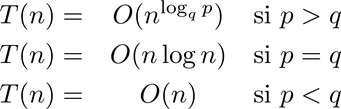

### Aplicando el Teorema

`T(n) = 2T(n/2) + cn`, Reconociendo los parámetros p, b, d se obtiene qué.

*   p = 2
*   b = 2, d = 1
*   d = 1
*   p = b<sup>d</sup> //p = 2

Se obtiene que p == q por lo que el tiempo de ejecución del sub-arreglo máximo
es de `O(n log n)` similar al del mergeSort.

**Identificando el mejor y peor caso**:

Al igual que el mergeSort el mejor y peor caso para este algoritmo es el mismo
osea que 


*   Mejor caso : Ω(n log n)
*   Peor caso : O(n log n)

Esto es debido a que independiente del orden aparente que tenga el arreglo este algoritmo actuara de la misma manera siempre. Tambien al obtener la misma complejidad en el peor y mejor caso indica que el tiempo de ejecucion final es de Θ(n log n).

# 5. Correctitud del máximo sub-arreglo

### Teorema 1 (correctitud de la funcion find_max_crossing_subarray)
El algoritmo retorna la suma máxima perteneciente al sub-arreglo central, calculando primer la suma máxima de 2 sub-arreglos (izquierda y derecha).
Estos sub-arreglos fueron hechos a partir del arreglo de entrada.

Probaremos la siguiente *propiedad invariante de bucle* para la función find_max_crossing_subarray.

> Al comienzo de cada iteración i y los i - 1 iteraciones anteriores retornan siempre la suma máxima sumando la suma máxima del sub-arreglo izquierdo y el derecho.

**Iniciación**

Al comienzo de la primera iteración (i=1),

*   Sub-arreglo izquierdo [ a ]
*   Sub-arreglo derecho [ b ]

obtiene las suma máxima de cada sub-arreglo, en este caso a y b para después sumarlas obteniendo:

*   Suma máxima Sub-arreglo central = a + b

Siendo esta la suma máxima central para el sub-arreglo central [ a , b ] por lo que es verdadero que a + b sea la suma máxima central.

**Mantención**

Asumiendo que en la i-ésima iteración obtenemos nuevamente 2 sub-arreglos.

* Sub-arreglo izquierdo [ a<sub>start</sub>, ....... , a<sub>mid</sub> ]
* Sub-arreglo derecho [ b<sub>mid + 1</sub>, ....... , b<sub>end</sub> ]

obtiene las suma máxima de cada sub-arreglo, para después sumarlas obteniendo:

1. Suma Máxima de [ a<sub>start</sub>, ..... , a<sub>mid</sub> ] = S<sub>1</sub>

2. Suma Máxima de [ b<sub>mid + 1</sub>, ..... , b<sub>end</sub> ] = S<sub>2</sub>

3. Suma Máxima Sub-arreglo central = S<sub>1</sub> + S<sub>2</sub>

Siendo esta la suma máxima central para el sub-arreglo central [ a<sub>start</sub> ,..........., b<sub>end</sub> ] por lo que es verdadero que S<sub>1</sub> + S<sub>2</sub> sea la suma máxima central.

**Como ambas afirmaciones son verdaderas, la propiedad invariante de bucle queda demostrada.**

### Teorema 2 (correctitud de la funcion find_max_subarray)
Para probar la correctitud de la función find_max_subarray se usará inducción.

**Caso Base** :

Para un T(n) con n = 1, esta función devolverá como suma máxima el único elemento dentro del arreglo, por lo que se cumple para T(1).

**Paso Inductivo** :

Para un T(n) debemos probar que un T(m) con m < n es cierta, en caso de serlo T(n) tambien lo es.

Para n elementos, la recursividad del algoritmo provoca que el arreglo n se divida en 2 sub-arreglos de tamaño m = (n/2) cada vez hasta que tenga tamaño 1 y retorne el valor dentro del arreglo de tamaño 1 que es la primera suma máxima de la recursividad para los sub-arreglos mientras que habrá otro valor máximo proveniente del find_max_crossing_subarray (anteriormente comprobado su correctitud) que es la suma máxima proveniente de la fusión de los 2 sub-arreglos para después comparar cuál de los 3 valores máximos es el mayor para retornarlo. Por lo tanto, **find_max_subarray es correcto.**

#6. Experimentacion

Para implementar el análisis de ejecución y cantidad de comparaciones, primero implementaremos 2 algoritmos adicionales del sub-arreglo máximo para compararlas con el algoritmo anteriormente descrito. Estas son el algoritmo de kadane y el algoritmo de fuerza bruta.

###  Kadane

Este algoritmo tiene como idea básica es encontrar todos los segmentos contiguos de un arreglo cuya suma nos dará el valor máximo, este algoritmo recorre el arreglo de izquierda a derecha. En el último paso cálculo el sub-arreglo con la suma más grande terminado en i para cada sub-arreglo.

Este arreglo tiene tiempo de ejecución O(n)

In [8]:
def kadane(arr):
    max = 0
    currentMax = 0
    for i in range (0, len(arr)):
        currentMax += arr[i]
        if currentMax < 0:
           currentMax = 0
        if max < currentMax:
           max = currentMax

    return max


### Fuerza Bruta

Este método es el más ineficiente de los 2 anteriores. Debido a que, terminaremos repasando cada posible sub-arreglo, y luego encontraremos la suma de todos ellos y finalmente, comparar todos los valores y averiguar la suma del sub-arreglo máximo. 

Este arreglo tiene tiempo de ejecución O(n<sup>2</sup>) 

In [13]:
def fuerzaBruta(arreglo):
    aux = arreglo[0]
    cont = 0
    for i in range (0,len(arreglo)):
        cont = 0
        for j in range (0,len(arreglo)):
            cont = cont + arreglo[j]
            if (cont > aux):
                aux = cont

    return aux   

### 6.1. Comparación de tiempo de ejecución

En el siguiente gráfico se comparara respecto al tiempo de ejecución entre los 3 algoritmos siendo las 3 sumas de máximo sub-arreglo, pero solucionara de diferentes maneras aun así ya habiendo escrito anteriormente las complejidades de los 3 algoritmos debería darnos algo como esto:

1.   Fuerza bruta O ( n<sub>2</sub> )
2.   Divide y vencerás O ( n log n )
3.   Kadane O ( n )  

Utilizaré tamaños n entre 5 a 500, para realizar la comparación.

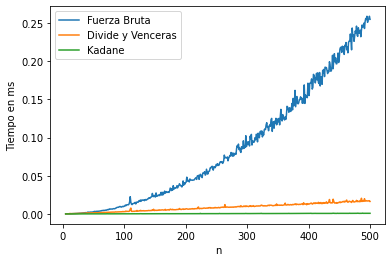

In [23]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy

x=[]
y_fuerzaBruta = []
y_divideConquer = []
y_kadane = []

for n in range(5,501):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)
  c = deepcopy(a)

  t_divide = repeat(setup="from __main__ import find_max_subarray", stmt=f"find_max_subarray({a},{0},{len(a)-1})", repeat=1, number=10)
  t_fuerza = repeat(setup="from __main__ import fuerzaBruta", stmt=f"fuerzaBruta({b})", repeat=1, number=10)
  t_kadane = repeat(setup="from __main__ import kadane", stmt=f"kadane({c})", repeat=1, number=10)

  x.append(n)
  y_fuerzaBruta.append(t_fuerza)
  y_divideConquer.append(t_divide)
  y_kadane.append(t_kadane)


plt.plot(x,y_fuerzaBruta)
plt.plot(x,y_divideConquer)
plt.plot(x,y_kadane)

plt.legend(["Fuerza Bruta", "Divide y Venceras","Kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Analisis del grafico

Se cumple con lo dicho anteriormente, como dicta sus complejidades, el que más se demora en realizar su ejecución es el algoritmo de fuerza bruta seguido de divide y vencerás y finalmente la más eficiente de los 3 algoritmos el  algoritmo de kadane con complejidad lineal O( n ). 

### 6.2. ¿Peor y Mejor caso son realmente el mismo?

Como dijimos anteriormente, el tiempo de ejecución para el peor y mejor caso es el mismo, pero será realmente ¿verdad? Habra que verlo con un gráfico.

Utilizaré un arreglo de tamaño fijo n = 10, pero con valores aleatorios.

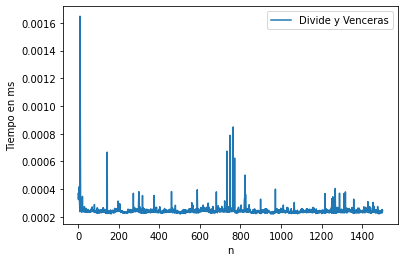

In [30]:
y_divideConquer = []
x=[]

for n in range(0,1501):

  a = random.sample(range(-50, 50), 10)

  t_divide = repeat(setup="from __main__ import find_max_subarray", stmt=f"find_max_subarray({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y_divideConquer.append(t_divide)

plt.plot(x,y_divideConquer)

plt.legend(["Divide y Venceras"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Analisis del grafico

Aunque en el gráfico se ve unas discrepancias, esto es esperable debido a que
al ejecutar el mismo código con los mismos datos no siempre tendrá el mismo tiempo de ejecución, sabiendo esto al fijarse en el gráfico se observa que el tiempo de ejecución es casi lineal viendo algunos casos donde se demoró un poco
más, pero incluso así la diferencia es mínima, técnicamente milésimas de segundos, por lo que podemos decir que independientemente del caso para el mismo tamaño de un arreglo n el tiempo de ejecución es casi siempre el mismo o entre un rango con una diferencia ínfima.